<a href="https://colab.research.google.com/github/ankit250505/Cognifyz_Intern_Tasks/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING AND INSTALLING PACKAGAES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree
import sklearn.impute
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**DATABASE**

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/cognifyz/restaurants.csv')
df1

,Restaurant ID_,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
df1.head(5)

,Restaurant ID_,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df1.tail(5)

,Restaurant ID_,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID_        9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df1.isnull().sum()

,0
Restaurant ID_,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
df1.shape

(9551, 21)

In [ ]:
df1.columns

Index(['Restaurant ID_', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df1.dtypes

,0
Restaurant ID_,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
df=df1.copy()

#**Data Dictionary**

---

Restaurant ID_ – Unique identifier assigned to each restaurant.

Restaurant Name – The official name of the restaurant.

Country Code – Numeric code representing the country where the restaurant operates (e.g., 162 for Philippines).

City – The city where the restaurant is located (e.g., Makati City, Pasay City).

Address – The full address including floor, building, and street details.

Locality – A shorter name for the area or neighborhood where the restaurant is situated.

Locality Verbose – A more descriptive location including the neighborhood, city, and region for better context.

Longitude – The geographic coordinate that specifies the east-west position of the restaurant.

Latitude – The geographic coordinate that specifies the north-south position of the restaurant.

Cuisines – The types of food offered by the restaurant, separated by commas (e.g., Japanese, French, Filipino).

Average Cost for two – The estimated cost for two people dining at the restaurant, in local currency units.

Currency – The currency used in pricing, such as "Botswana Pula(P)" in this dataset.

Has Table booking – Indicates whether the restaurant accepts reservations:

  * Yes = Table booking available
  * No = Table booking not available

Has Online delivery – Indicates whether the restaurant offers online delivery services:

  * Yes = Online delivery available
  * No = Online delivery not available

Is delivering now – Shows whether the restaurant is currently delivering orders:
  * Yes = Delivering now
  * No = Not delivering now

Switch to order menu – Indicates if switching to an alternate order menu option is possible:
  * Yes = Option available
  * No = Option not available
  
Price range – A numerical representation of the cost level:

  * 1 = Low

  * 2 = Moderate

  * 3 = High

  * 4 = Very high

Aggregate rating – The average customer rating (typically out of 5).

Rating color – A color code representing the rating visually (e.g., Dark Green for excellent ratings, Green for good ratings).

Rating text – A descriptive summary of the rating (e.g., Excellent, Very Good).

Votes – The total number of customer reviews or votes that contributed to the rating.

#**Task 1**
---

  * Objective:

    Build a machine learning model to predict the
    aggregate rating of a restaurant based on other features.

  * Steps:

    1.  Preprocess the dataset by handling missing values,
        encoding categorical variables, and splitting the data
        into training and testing sets.
    2.  Select a regression algorithm (e.g., linear regression,
        decision tree regression) and train it on the training data.
    3.  Evaluate the model's performance using appropriate
        regression metrics (e.g., mean squared error, R-squared)
        on the testing data.
    4.  Interpret the model's results and analyze the most
        influential features affecting restaurant ratings.

**DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [ ]:
# Load the dataset
print("🍽️ Loading Restaurant Dataset...")
df = pd.read_csv('/content/drive/MyDrive/cognifyz/restaurants.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Step 1: Data Preprocessing and Exploratory Data Analysis
def perform_eda(df):
    """
    Perform comprehensive exploratory data analysis
    """
    print("\n📊 EXPLORATORY DATA ANALYSIS")
    print("="*50)

    # Basic information
    print("Dataset Info:")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

    # Missing values
    print("\n🔍 Missing Values Analysis:")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Percentage': missing_percent
    })
    print(missing_df[missing_df['Missing Count'] > 0])

    # Target variable statistics
    print(f"\n🎯 Target Variable ('Aggregate rating') Statistics:")
    print(df['Aggregate rating'].describe())

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribution of aggregate ratings
    axes[0,0].hist(df['Aggregate rating'], bins=20, edgecolor='black', alpha=0.7)
    axes[0,0].set_title('Distribution of Aggregate Ratings')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].set_ylabel('Frequency')

    # Rating vs Price Range
    df.boxplot(column='Aggregate rating', by='Price range', ax=axes[0,1])
    axes[0,1].set_title('Rating Distribution by Price Range')
    axes[0,1].set_xlabel('Price Range')

    # Cost vs Rating scatter plot
    axes[1,0].scatter(df['Average Cost for two'], df['Aggregate rating'], alpha=0.6)
    axes[1,0].set_title('Average Cost vs Rating')
    axes[1,0].set_xlabel('Average Cost for Two')
    axes[1,0].set_ylabel('Aggregate Rating')

    # Votes vs Rating
    axes[1,1].scatter(df['Votes'], df['Aggregate rating'], alpha=0.6)
    axes[1,1].set_title('Votes vs Rating')
    axes[1,1].set_xlabel('Number of Votes')
    axes[1,1].set_ylabel('Aggregate Rating')

    plt.tight_layout()
    plt.show()

    return df

🍽️ Loading Restaurant Dataset...
Dataset shape: (9551, 21)
Columns: ['Restaurant ID_', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


 **Data Preprocessing**

In [ ]:
def preprocess_data(df):
    """
    Comprehensive data preprocessing pipeline
    """
    print("\n🔧 DATA PREPROCESSING")
    print("="*30)

    # Create a copy for processing
    df_processed = df.copy()

    # Handle missing values - replace 0 ratings with median
    median_rating = df_processed[df_processed['Aggregate rating'] > 0]['Aggregate rating'].median()
    df_processed['Aggregate rating'] = df_processed['Aggregate rating'].replace(0, median_rating)
    print(f"Replaced 0 ratings with median: {median_rating}")

    # Feature engineering
    print("\n🔨 Feature Engineering:")

    # Extract cuisine count
    df_processed['Cuisine_Count'] = df_processed['Cuisines'].str.count(',') + 1
    print("✅ Added Cuisine_Count feature")

    # Create cost per person
    df_processed['Cost_per_person'] = df_processed['Average Cost for two'] / 2
    print("✅ Added Cost_per_person feature")

    # Encode categorical variables
    le_city = LabelEncoder()
    le_locality = LabelEncoder()
    le_cuisines = LabelEncoder()
    le_currency = LabelEncoder()
    le_rating_color = LabelEncoder()

    df_processed['City_encoded'] = le_city.fit_transform(df_processed['City'])
    df_processed['Locality_encoded'] = le_locality.fit_transform(df_processed['Locality'])
    df_processed['Cuisines_encoded'] = le_cuisines.fit_transform(df_processed['Cuisines'])
    df_processed['Currency_encoded'] = le_currency.fit_transform(df_processed['Currency'])
    df_processed['Rating_color_encoded'] = le_rating_color.fit_transform(df_processed['Rating color'])

    print("✅ Encoded categorical variables")

    # Convert boolean-like strings to numeric
    bool_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
    for col in bool_cols:
        df_processed[col + '_encoded'] = df_processed[col].map({'Yes': 1, 'No': 0})

    print("✅ Converted boolean features to numeric")

    # Select features for modeling
    feature_cols = [
        'Country Code', 'City_encoded', 'Locality_encoded', 'Cuisines_encoded',
        'Average Cost for two', 'Currency_encoded', 'Price range', 'Votes',
        'Has Table booking_encoded', 'Has Online delivery_encoded',
        'Is delivering now_encoded', 'Switch to order menu_encoded',
        'Cuisine_Count', 'Cost_per_person'
    ]

    X = df_processed[feature_cols]
    y = df_processed['Aggregate rating']

    print(f"\n📋 Final feature set: {len(feature_cols)} features")
    print(f"Features: {feature_cols}")

    return X, y, df_processed

**Model Training and Evaluation**

In [ ]:
from sklearn.impute import SimpleImputer

def train_and_evaluate_models(X, y):
    """
    Train multiple regression models and evaluate performance
    """
    print("\n🤖 MODEL TRAINING AND EVALUATION")
    print("="*40)

    # Check for missing values
    print(f"\n📊 Data Quality Check:")
    print(f"Missing values in X: {X.isnull().sum().sum()}")
    print(f"Missing values in y: {y.isnull().sum() if hasattr(y, 'isnull') else 0}")

    # Handle missing values in X
    if X.isnull().sum().sum() > 0:
        print("\n⚠️ Found missing values in features. Applying imputation...")
        imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
        X_imputed = pd.DataFrame(
            imputer.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        print(f"Missing values after imputation: {X_imputed.isnull().sum().sum()}")
    else:
        X_imputed = X

    # Handle missing values in y
    if hasattr(y, 'isnull') and y.isnull().sum() > 0:
        print(f"\n⚠️ Found {y.isnull().sum()} missing values in target variable.")
        # Remove rows with missing target values
        mask = ~y.isnull()
        X_imputed = X_imputed[mask]
        y = y[mask]
        print(f"Samples after removing missing targets: {len(y)}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.3, random_state=42
    )
    print(f"\nTraining set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Decision Tree': DecisionTreeRegressor(
            random_state=42,
            max_depth=10,
            min_samples_split=2
        ),
        'Random Forest': RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            max_depth=10
        ),
        'Linear Regression': LinearRegression()
    }

    results = {}
    trained_models = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n🔍 Training {name}...")

        try:
            if name == 'Linear Regression':
                # Use scaled data for linear regression
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                # Use original data for tree-based models
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[name] = {
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R²': r2,
                'predictions': y_pred
            }

            trained_models[name] = model

            print(f"  📈 MSE: {mse:.4f}")
            print(f"  📈 RMSE: {rmse:.4f}")
            print(f"  📈 MAE: {mae:.4f}")
            print(f"  📈 R²: {r2:.4f}")

        except Exception as e:
            print(f"  ❌ Error training {name}: {str(e)}")
            continue

    # Only create plots if we have results
    if results:
        # Create comparison plot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Model comparison
        metrics_df = pd.DataFrame({
            model: {metric: results[model][metric]
                   for metric in ['MSE', 'RMSE', 'MAE', 'R²']}
            for model in results.keys()
        }).T

        # Error metrics comparison
        metrics_df[['MSE', 'RMSE', 'MAE']].plot(kind='bar', ax=axes[0,0])
        axes[0,0].set_title('Model Performance Comparison (Lower is Better)')
        axes[0,0].set_ylabel('Error Value')
        axes[0,0].tick_params(axis='x', rotation=45)
        axes[0,0].legend(loc='best')

        # R² comparison
        metrics_df['R²'].plot(kind='bar', ax=axes[0,1], color='green')
        axes[0,1].set_title('R² Score Comparison (Higher is Better)')
        axes[0,1].set_ylabel('R² Score')
        axes[0,1].tick_params(axis='x', rotation=45)
        axes[0,1].set_ylim([0, 1])

        # Actual vs Predicted for best model
        best_model = max(results.keys(), key=lambda x: results[x]['R²'])
        y_pred_best = results[best_model]['predictions']

        axes[1,0].scatter(y_test, y_pred_best, alpha=0.6, edgecolors='black', linewidth=0.5)
        axes[1,0].plot([y_test.min(), y_test.max()],
                       [y_test.min(), y_test.max()],
                       'r--', lw=2, label='Perfect Prediction')
        axes[1,0].set_xlabel('Actual Rating')
        axes[1,0].set_ylabel('Predicted Rating')
        axes[1,0].set_title(f'Actual vs Predicted ({best_model})')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # Residuals plot
        residuals = y_test - y_pred_best
        axes[1,1].scatter(y_pred_best, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
        axes[1,1].axhline(y=0, color='r', linestyle='--', label='Zero Residual')
        axes[1,1].set_xlabel('Predicted Rating')
        axes[1,1].set_ylabel('Residuals')
        axes[1,1].set_title(f'Residuals Plot ({best_model})')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print best model summary
        print("\n" + "="*40)
        print(f"🏆 BEST MODEL: {best_model}")
        print(f"   R² Score: {results[best_model]['R²']:.4f}")
        print(f"   RMSE: {results[best_model]['RMSE']:.4f}")
        print("="*40)
    else:
        print("\n❌ No models were successfully trained.")

    return trained_models, results, X_imputed, X_test, y_train, y_test, scaler

**Feature Importance Analysis**

In [ ]:
def analyze_feature_importance(models, X, feature_names):
    """
    Analyze and visualize feature importance
    """
    print("\n🎯 FEATURE IMPORTANCE ANALYSIS")
    print("="*35)

    plt.figure(figsize=(15, 10))

    # Decision Tree Feature Importance
    if 'Decision Tree' in models:
        dt_importance = models['Decision Tree'].feature_importances_

        plt.subplot(2, 2, 1)
        indices = np.argsort(dt_importance)[::-1]
        plt.bar(range(len(dt_importance)), dt_importance[indices])
        plt.title('Decision Tree - Feature Importance')
        plt.xticks(range(len(dt_importance)), [feature_names[i] for i in indices], rotation=45, ha='right')

        print("🌳 Decision Tree - Top 5 Important Features:")
        for i in range(min(5, len(indices))):
            print(f"  {i+1}. {feature_names[indices[i]]}: {dt_importance[indices[i]]:.4f}")

    # Random Forest Feature Importance
    if 'Random Forest' in models:
        rf_importance = models['Random Forest'].feature_importances_

        plt.subplot(2, 2, 2)
        indices = np.argsort(rf_importance)[::-1]
        plt.bar(range(len(rf_importance)), rf_importance[indices])
        plt.title('Random Forest - Feature Importance')
        plt.xticks(range(len(rf_importance)), [feature_names[i] for i in indices], rotation=45, ha='right')

        print("\n🌲 Random Forest - Top 5 Important Features:")
        for i in range(min(5, len(indices))):
            print(f"  {i+1}. {feature_names[indices[i]]}: {rf_importance[indices[i]]:.4f}")

    # Linear Regression Coefficients
    if 'Linear Regression' in models:
        lr_coef = np.abs(models['Linear Regression'].coef_)

        plt.subplot(2, 2, 3)
        indices = np.argsort(lr_coef)[::-1]
        plt.bar(range(len(lr_coef)), lr_coef[indices])
        plt.title('Linear Regression - Absolute Coefficients')
        plt.xticks(range(len(lr_coef)), [feature_names[i] for i in indices], rotation=45, ha='right')

        print("\n📈 Linear Regression - Top 5 Important Features (by |coefficient|):")
        for i in range(min(5, len(indices))):
            orig_coef = models['Linear Regression'].coef_[indices[i]]
            print(f"  {i+1}. {feature_names[indices[i]]}: {orig_coef:.4f}")

    # Decision Tree Visualization
    if 'Decision Tree' in models:
        plt.subplot(2, 2, 4)
        plot_tree(models['Decision Tree'], max_depth=3, feature_names=feature_names,
                 filled=True, rounded=True, fontsize=8)
        plt.title('Decision Tree Structure (Depth=3)')

    plt.tight_layout()
    plt.show()

**Model Interpretation and Insights**

In [ ]:
def generate_insights(results, df_processed):
    """
    Generate business insights from the model results
    """
    print("\n🔍 MODEL INSIGHTS AND BUSINESS IMPLICATIONS")
    print("="*50)

    # Best performing model
    best_model = max(results.keys(), key=lambda x: results[x]['R²'])
    best_r2 = results[best_model]['R²']

    print(f"🏆 Best Performing Model: {best_model}")
    print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.1f}% variance explained)")

    # Performance interpretation
    if best_r2 > 0.8:
        performance = "Excellent"
    elif best_r2 > 0.6:
        performance = "Good"
    elif best_r2 > 0.4:
        performance = "Moderate"
    else:
        performance = "Poor"

    print(f"   Model Performance: {performance}")

    # Data insights
    print(f"\n📊 Dataset Insights:")
    print(f"   • Average rating: {df_processed['Aggregate rating'].mean():.2f}")
    print(f"   • Rating range: {df_processed['Aggregate rating'].min():.1f} - {df_processed['Aggregate rating'].max():.1f}")
    print(f"   • Most common price range: {df_processed['Price range'].mode()[0]}")

    # Correlation insights
    print(f"\n🔗 Key Correlations with Rating:")
    numeric_cols = ['Average Cost for two', 'Price range', 'Votes', 'Cuisine_Count']
    correlations = df_processed[numeric_cols + ['Aggregate rating']].corr()['Aggregate rating'].sort_values(key=abs, ascending=False)

    for col in correlations.index[1:]:  # Skip self-correlation
        corr_val = correlations[col]
        direction = "positive" if corr_val > 0 else "negative"
        strength = "strong" if abs(corr_val) > 0.5 else "moderate" if abs(corr_val) > 0.3 else "weak"
        print(f"   • {col}: {corr_val:.3f} ({strength} {direction})")

**Main execution pipeline**

In [ ]:
def main():
    """
    Main execution pipeline for the restaurant rating prediction project
    """
    print("🚀 RESTAURANT RATING PREDICTION MODEL")
    print("="*55)

    # Load and explore data
    df = pd.read_csv('/content/drive/MyDrive/cognifyz/restaurants.csv')
    df = perform_eda(df)

    # Preprocess data
    X, y, df_processed = preprocess_data(df)

    # Train and evaluate models
    trained_models, results, X_train, X_test, y_train, y_test, scaler = train_and_evaluate_models(X, y)

    # Analyze feature importance
    analyze_feature_importance(trained_models, X, X.columns.tolist())

    # Generate insights
    generate_insights(results, df_processed)

    print(f"\n✅ Analysis Complete!")
    print(f"   📁 Models trained: {len(trained_models)}")
    print(f"   📊 Best model R²: {max(results.values(), key=lambda x: x['R²'])['R²']:.4f}")

    return trained_models, results, df_processed

**Execute the complete pipeline**

🚀 RESTAURANT RATING PREDICTION MODEL

📊 EXPLORATORY DATA ANALYSIS
Dataset Info:
Shape: (9551, 21)
Memory usage: 8174.31 KB

🔍 Missing Values Analysis:
          Missing Count  Percentage
Cuisines              9    0.094231

🎯 Target Variable ('Aggregate rating') Statistics:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


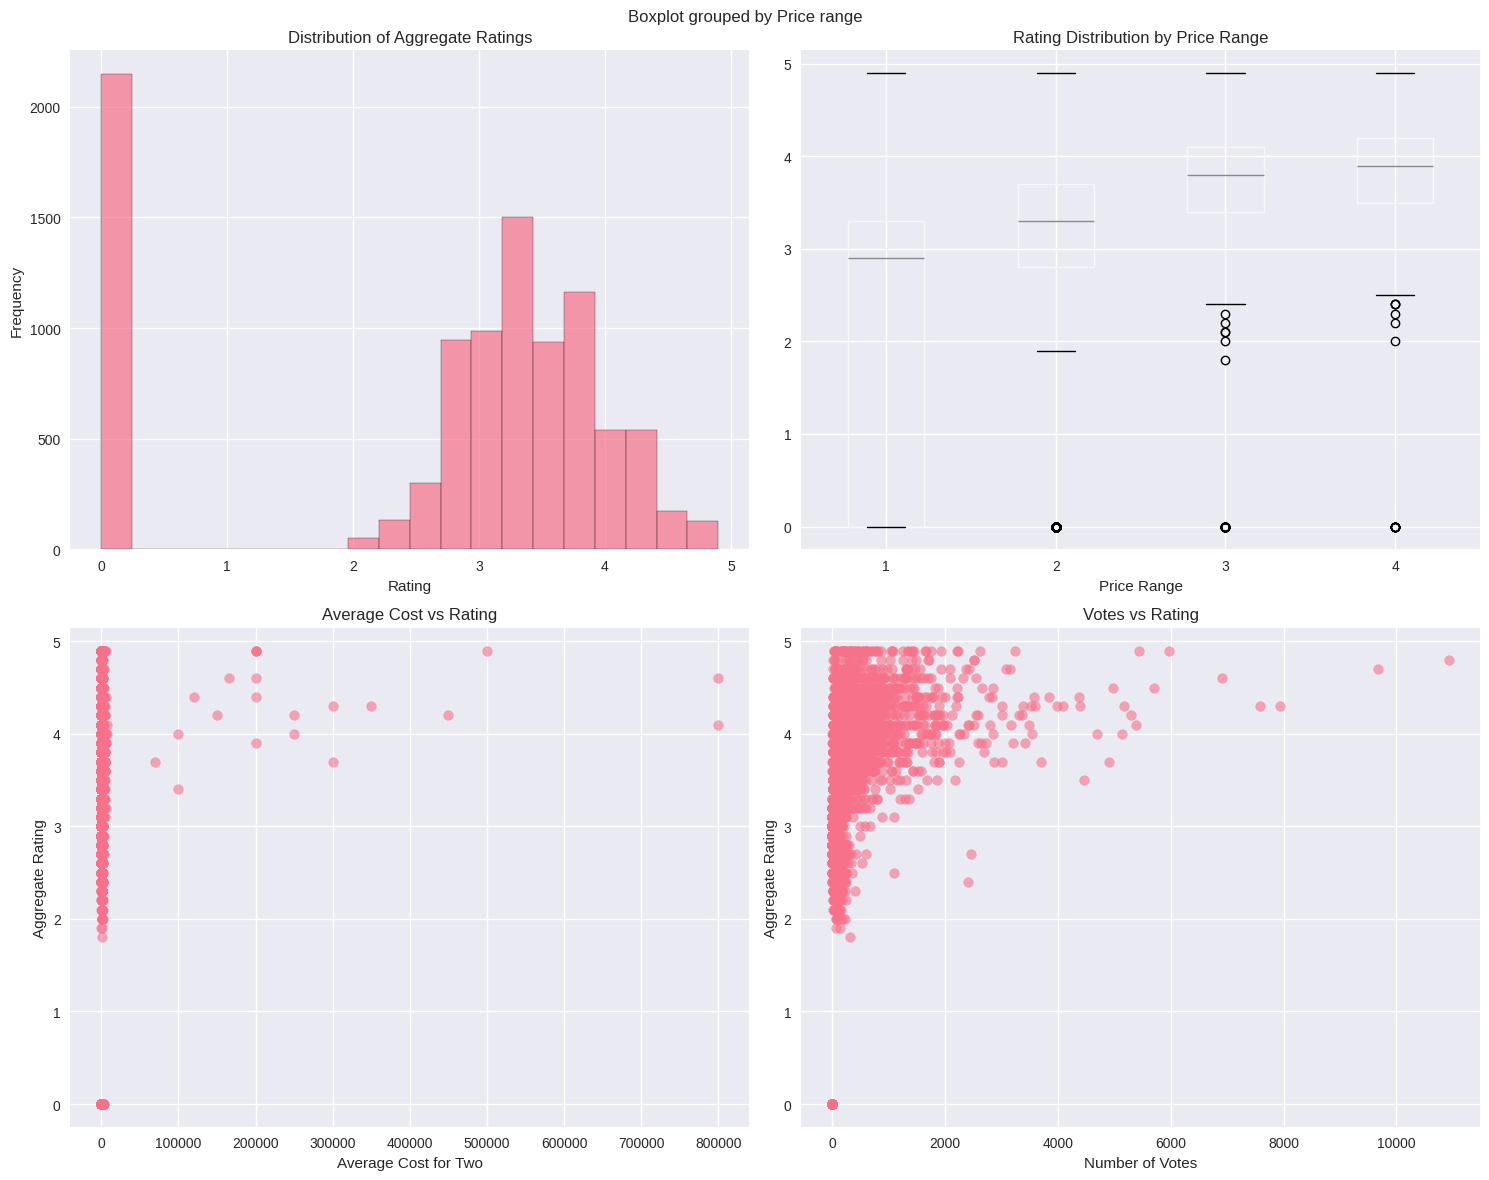


🔧 DATA PREPROCESSING
Replaced 0 ratings with median: 3.4

🔨 Feature Engineering:
✅ Added Cuisine_Count feature
✅ Added Cost_per_person feature
✅ Encoded categorical variables
✅ Converted boolean features to numeric

📋 Final feature set: 14 features
Features: ['Country Code', 'City_encoded', 'Locality_encoded', 'Cuisines_encoded', 'Average Cost for two', 'Currency_encoded', 'Price range', 'Votes', 'Has Table booking_encoded', 'Has Online delivery_encoded', 'Is delivering now_encoded', 'Switch to order menu_encoded', 'Cuisine_Count', 'Cost_per_person']

🤖 MODEL TRAINING AND EVALUATION

📊 Data Quality Check:
Missing values in X: 9
Missing values in y: 0

⚠️ Found missing values in features. Applying imputation...
Missing values after imputation: 0

Training set: 6685 samples
Testing set: 2866 samples

🔍 Training Decision Tree...
  📈 MSE: 0.1224
  📈 RMSE: 0.3499
  📈 MAE: 0.2273
  📈 R²: 0.4754

🔍 Training Random Forest...
  📈 MSE: 0.0966
  📈 RMSE: 0.3108
  📈 MAE: 0.2011
  📈 R²: 0.5861

🔍 T

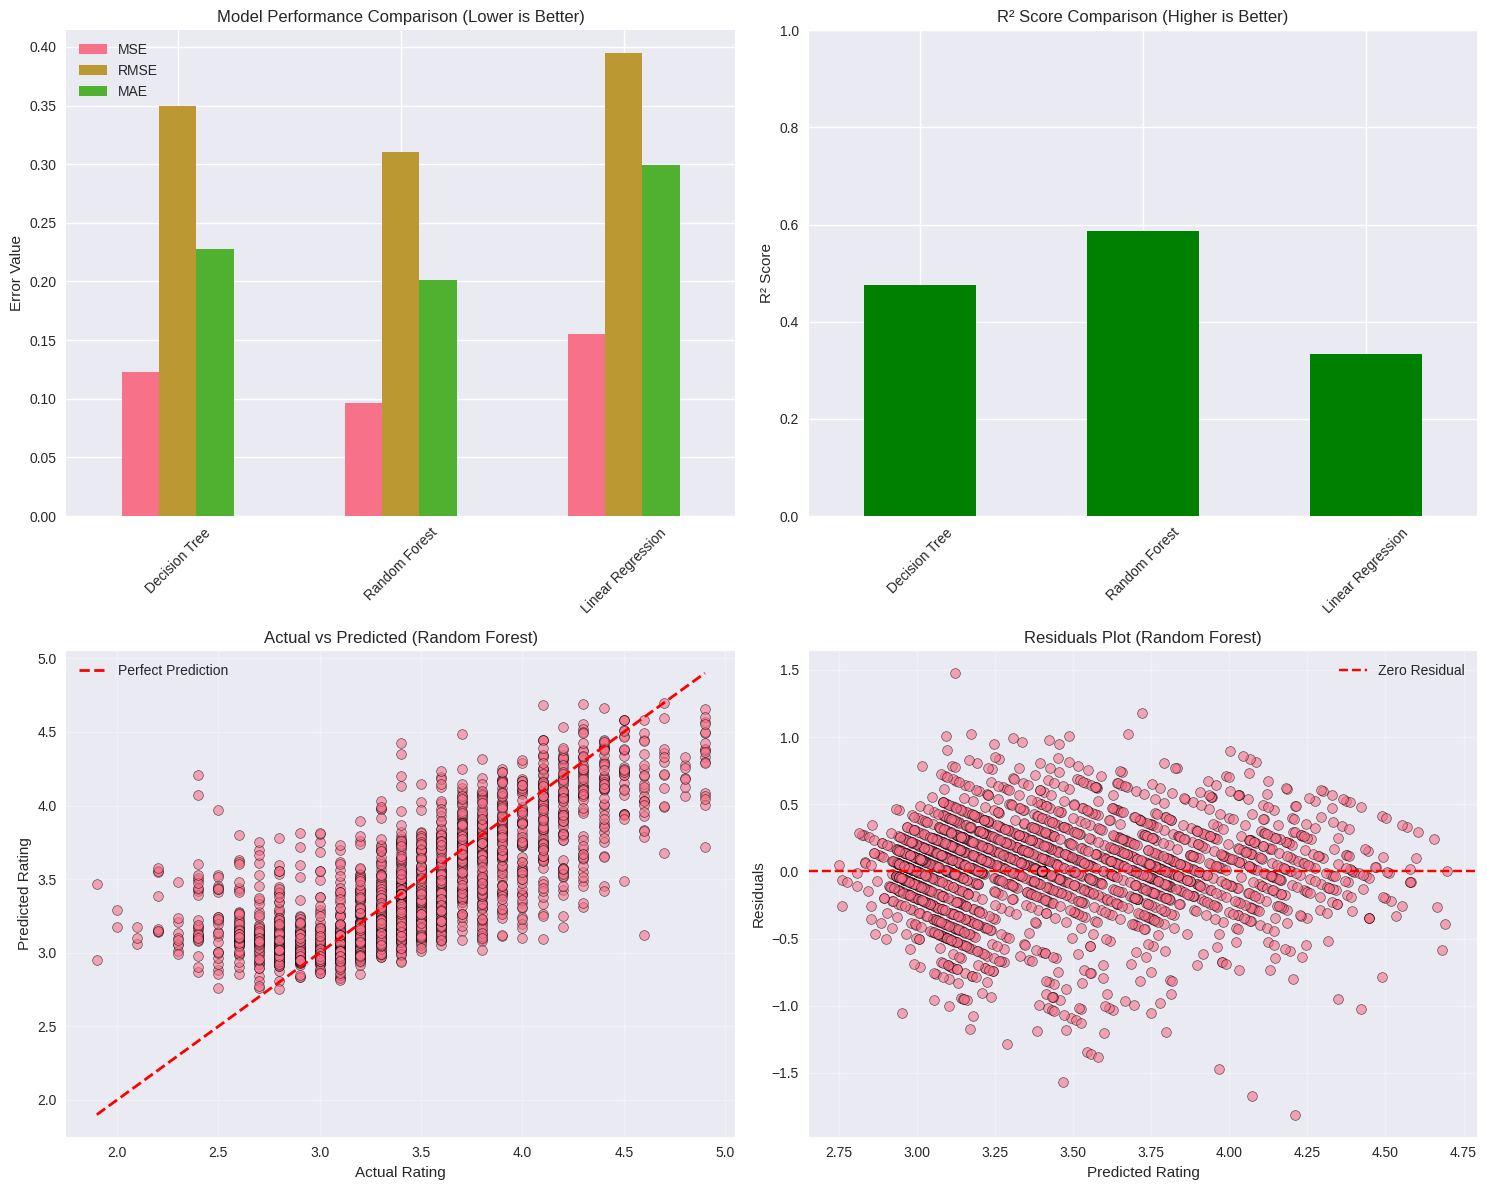


🏆 BEST MODEL: Random Forest
   R² Score: 0.5861
   RMSE: 0.3108

🎯 FEATURE IMPORTANCE ANALYSIS
🌳 Decision Tree - Top 5 Important Features:
  1. Votes: 0.6457
  2. Country Code: 0.1219
  3. Cuisines_encoded: 0.0659
  4. City_encoded: 0.0430
  5. Locality_encoded: 0.0420

🌲 Random Forest - Top 5 Important Features:
  1. Votes: 0.6269
  2. Country Code: 0.1114
  3. Cuisines_encoded: 0.0804
  4. Locality_encoded: 0.0444
  5. City_encoded: 0.0443

📈 Linear Regression - Top 5 Important Features (by |coefficient|):
  1. Votes: 0.1408
  2. Country Code: 0.1344
  3. Price range: 0.1064
  4. Cuisines_encoded: -0.0418
  5. Locality_encoded: -0.0280


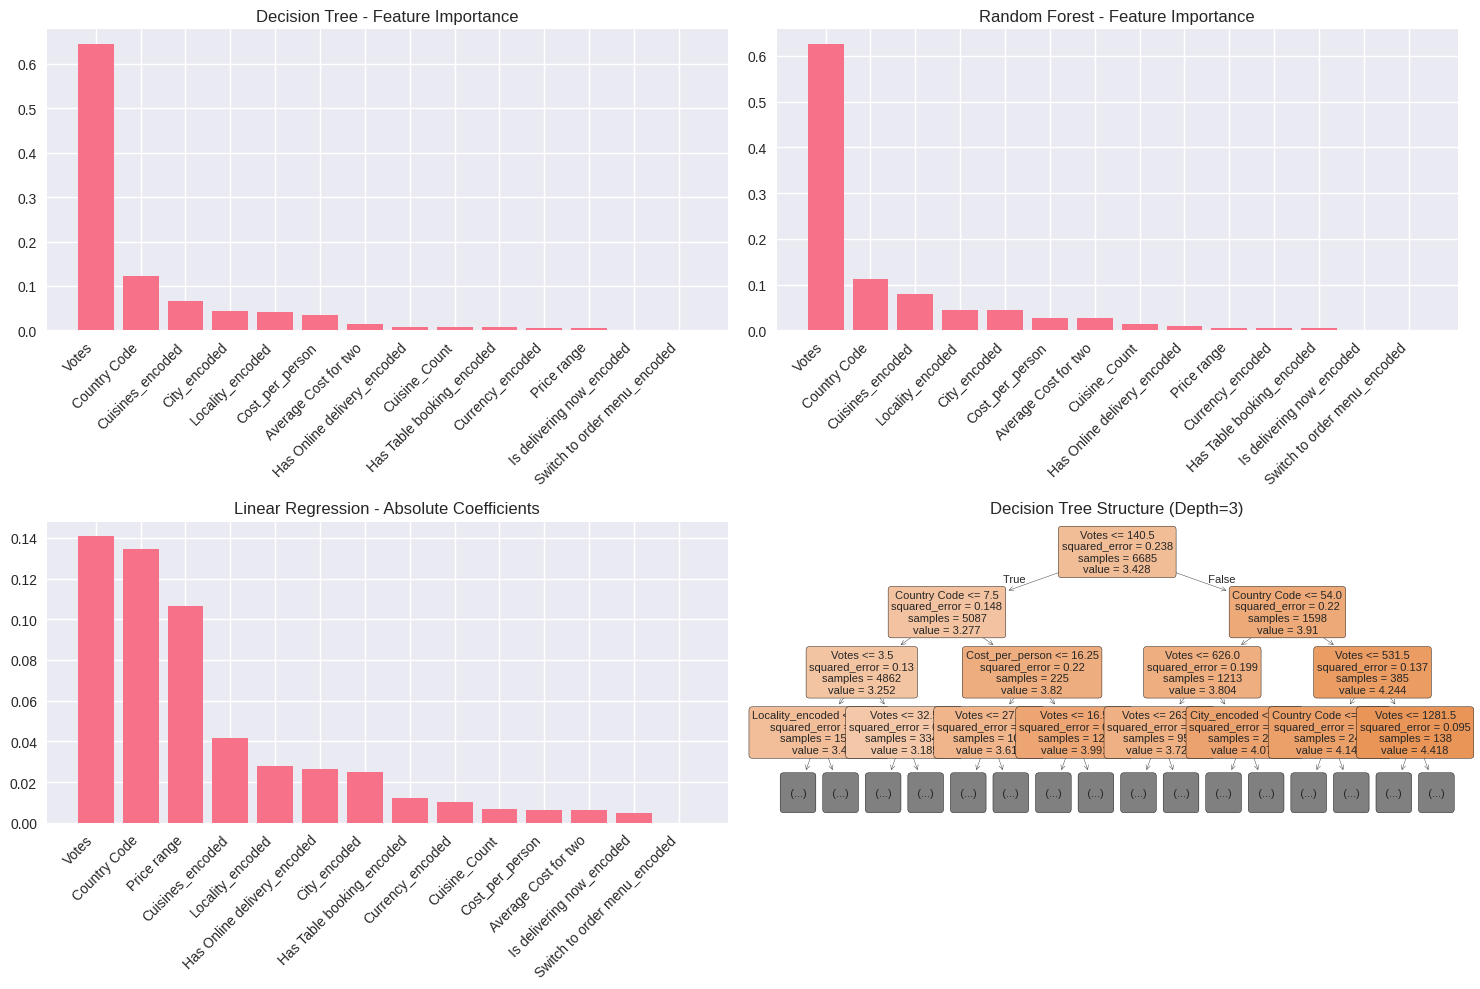


🔍 MODEL INSIGHTS AND BUSINESS IMPLICATIONS
🏆 Best Performing Model: Random Forest
   R² Score: 0.5861 (58.6% variance explained)
   Model Performance: Moderate

📊 Dataset Insights:
   • Average rating: 3.43
   • Rating range: 1.8 - 4.9
   • Most common price range: 1

🔗 Key Correlations with Rating:
   • Votes: 0.408 (moderate positive)
   • Price range: 0.376 (moderate positive)
   • Cuisine_Count: 0.114 (weak positive)
   • Average Cost for two: 0.078 (weak positive)

✅ Analysis Complete!
   📁 Models trained: 3
   📊 Best model R²: 0.5861


In [ ]:
if __name__ == "__main__":
    trained_models, results, df_processed = main()